In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [6]:
df_usa = df[df['job_country'] == 'United States'].copy(deep=True)
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime("%B")	
df_usa_pivot = df_usa.pivot_table(index='job_posted_month', columns='job_title_short',aggfunc='size')

In [7]:
from time import strptime
def sort_chronologically(idx):
  return idx.map(lambda m: strptime(m,'%B').tm_mon)

df_usa_pivot.sort_index(key=sort_chronologically,inplace=True)

In [8]:
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [13]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')
# df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv')
# df_US_software_pivot.set_index('job_posted_month',inplace=True)
df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [15]:
df_usa_merged = df_usa_pivot.merge(df_US_software_pivot,on='job_posted_month')

In [16]:
df_usa_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [32]:
top_5 = (
  df_usa_merged
  .sum()
  .sort_values(ascending=False)
  .head(5)
  .index
  .to_list()
)

In [33]:
df_usa_merged[top_5]

,Front-End Developer,Back-End Developer,Full-Stack Developer,Data Analyst,Data Scientist
job_posted_month,,,,,
January,13619,9827,5108,8494,6915
February,11456,9116,7298,6124,4956
March,11102,8178,5814,6218,4779
April,14037,9209,7232,6049,4867
May,12126,8864,6718,4993,4377
June,12003,8065,5902,5683,4645
July,11914,8061,6839,5201,4876
August,11571,8191,7413,6634,6318
September,14016,8447,6139,4639,4568


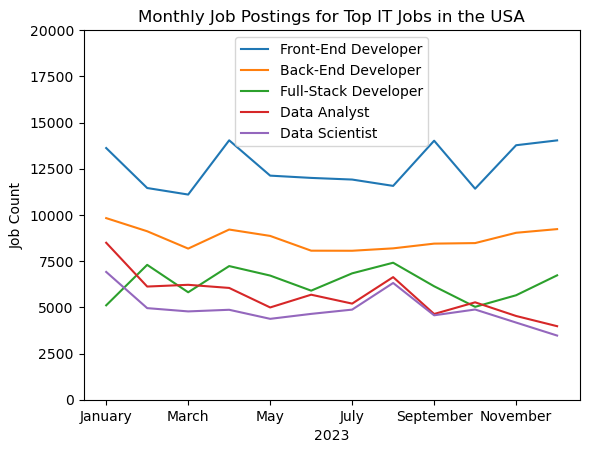

In [35]:
df_usa_merged[top_5].plot(kind='line')
plt.title("Monthly Job Postings for Top IT Jobs in the USA")
plt.ylabel("Job Count")
plt.xlabel("2023")
plt.ylim(0,20000)
plt.legend(title='')
plt.show()

In [30]:
df_usa_merged.sum().info()

<class 'pandas.core.series.Series'>
Index: 14 entries, Business Analyst to UI/UX Designer
Series name: None
Non-Null Count  Dtype
--------------  -----
14 non-null     int64
dtypes: int64(1)
memory usage: 780.0+ bytes
